Objectivo 1: guarde este codigo en su Google Driva para que puedas obtenerlo más tarde
1. "Archivo"
2. "Guardar una copia en Drive;" cualquier ubicación funciona

Si no creas una copia de este código, vas a perder todos tus cambios.

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

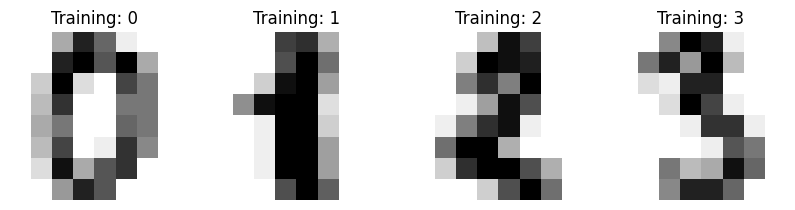

In [ ]:
# visualizar los datos que vamos a entrenar el modelo
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [13]:
from sklearn.neural_network import MLPClassifier
# cambia los imaganes de 8x8 a 64x1 porque el modelo solo funciona con una dimension (no dos)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# crear un modelo de classification: a support vector classifier
clf = MLPClassifier(alpha=1, max_iter=1000, random_state=42)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

# entrenar el modelo en los 50% do los datos
clf.fit(X_train, y_train)

# determina cuales son los valores numericos que predictimos para el test dataset
predicted = clf.predict(X_test)

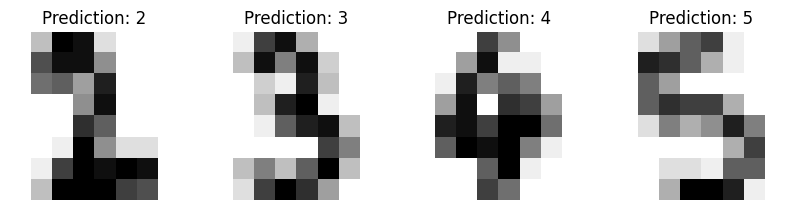

In [14]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

#dibjua los imagenes y cual es la prediccion
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [15]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier MLPClassifier(alpha=1, max_iter=1000, random_state=42):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.89      0.86      0.87        36
           2       0.97      1.00      0.99        35
           3       1.00      0.76      0.86        37
           4       0.94      0.92      0.93        37
           5       0.93      1.00      0.96        37
           6       0.97      0.97      0.97        37
           7       0.97      0.97      0.97        36
           8       0.81      0.91      0.86        33
           9       0.81      0.92      0.86        37

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.92       360
weighted avg       0.93      0.93      0.92       360




Confusion matrix:
[[33  0  0  0  1  0  1  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  5]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 28  0  2  0  1  5  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 0  2  0  0  1  0  0  0 30  0]
 [ 0  1  0  0  0  1  0  0  1 34]]
0.9292910767910769
0.925


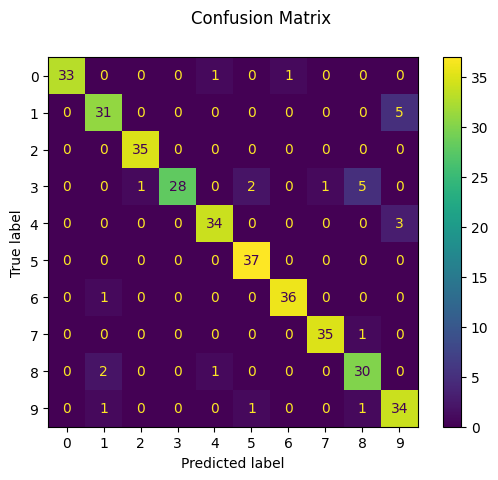

In [22]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
from sklearn.metrics import precision_score, accuracy_score

precision = precision_score(y_test, predicted, average='macro')
print(precision)
accuracy = accuracy_score(y_test, predicted)
print(accuracy)
plt.show()